# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.140237e+01     7.705786e+00
 * time: 0.001965045928955078
     1     2.903798e+01     5.667627e+00
 * time: 0.007879018783569336
     2     2.507365e+01     9.830946e+00
 * time: 0.015148162841796875
     3     2.412091e+01     1.236110e+01
 * time: 0.022773027420043945
     4     1.206173e+01     3.172362e+00
 * time: 0.030080080032348633
     5     9.715838e+00     1.708881e+00
 * time: 0.03453207015991211
     6     9.162285e+00     1.192765e+00
 * time: 0.038050174713134766
     7     8.849915e+00     6.921314e-01
 * time: 0.04168105125427246
     8     8.601359e+00     7.277863e-01
 * time: 0.0458531379699707
     9     8.430017e+00     6.963882e-01
 * time: 0.05035400390625
    10     8.301419e+00     6.085309e-01
 * time: 0.05489706993103027
    11     8.211913e+00     5.852912e-01
 * time: 0.05965709686279297
    12     8.124586e+00     6.426147e-01
 * time: 0.06302118301391602
    13     8.052352e+00     5.779224e-01
 * tim

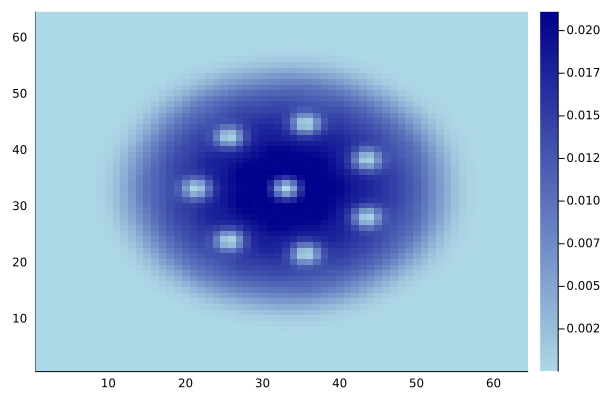

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)